<a href="https://colab.research.google.com/github/Alekhya-pvsns/assignments/blob/master/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Implementation: Training a Neural Network

Step 1: Importing and loading the datasets

In [ ]:
import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

#loading train dataset

df_tnds = pd.read_csv('/content/drive/MyDrive/dataset/train (1).csv')
df_tnds.head()

In [ ]:
# converting the train dataset into tensors

x_train = torch.tensor(df_tnds['x'].values, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(df_tnds['y'].values, dtype=torch.float32)

In [ ]:
# loading test dataset

df_tsds = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')
df_tsds.head()

In [ ]:
# converting test dataset into tensors

x_test = torch.tensor(df_tsds['x'].values, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(df_tsds['y'].values, dtype=torch.float32)

In [ ]:
# plotting the dataset

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

Step 2: Building the NN model

In [ ]:
#  Step 2: Building the NN model

model = nn.Linear(1, 1)
model

Step 3: Defining a loss function

In [ ]:
loss_fn = nn.MSELoss()

Step 4: Defining Optimization

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7cba2380fa00>

In [ ]:
for name, param in model.named_parameters():
  print(name, param)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Step 5: Training the loop

In [ ]:
N = 500 # number of epochs
loss_hist = [] # maintaining loss values for visualization

for iter in range(N):
  yp = model(x_train)
  loss = loss_fn(yp.squeeze(), y_train)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  loss_hist.append(loss.item())
  print(loss.item())

In [ ]:
# training some random samples on the model

x_viz = torch.linspace(x_train.min(), x_train.max(), 100).unsqueeze(1)
y_viz = model(x_viz)

# Plotting

plt.scatter(x_train, y_train)
plt.plot(x_viz.detach(), y_viz.detach(), 'r')

In [ ]:
# Learning curve

plt.plot(range(N), loss_hist)

Step 6: Testing model on test dataset

In [ ]:
yp = model(x_test)
# F.l1_loss(yp_squeeze(), y_test)   ---- getting an error as F is not defined so used torch.nn.functional
torch.nn.functional.l1_loss(yp.squeeze(), y_test)


Second Implementation : Training a convolutional neural network (CNN)

In [ ]:
# Importing Libraries

import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt

#Downloading training dataset

train_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True
)

100%|██████████| 170498071/170498071 [00:03<00:00, 48882194.27it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Downloading test dataset

test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True
)

Files already downloaded and verified


Checking one of the images

Label: 8


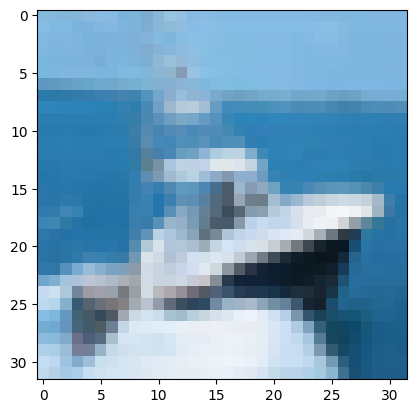

In [ ]:
image, label = train_data[8]
plt.imshow(image)
print('Label:', label)


Converting images into tensors

In [ ]:
from torchvision.transforms import ToTensor

# Converting the train data into tensors

train_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    transform=ToTensor()
)

# Converting the test data into tensors

test_data = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    transform=ToTensor()
)

Batch size and DataLoader

In [ ]:
batch_size = 64

# Creating data loaders for train and test

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Checking one batch of dataloader

In [ ]:
# Checking for train dataloader

for image, labels in train_dataloader:
  print(labels.shape)
  print(image.shape)
  break

torch.Size([64])
torch.Size([64, 3, 32, 32])


Visualizing one batch of images

In [ ]:
classes = ("planes", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#visualizing one batch of images
def imshow(img):
    # Denormalize the images
    img = img / 2 + 0.5
    np_img = img.numpy()
    transposed = np.transpose(np_img, (1, 2, 0))
    plt.imshow(transposed)
    plt.show()

In [ ]:
print("Type of train_dataloader:", type(train_dataloader))
print("Value of train_dataloader:", train_dataloader)


Type of train_dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
Value of train_dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7852a0567430>


In [ ]:
iterator = iter(train_dataloader)

# Get a batch of images and labels
images, labels = next(iterator)

# Visualize the batch of images
imshow(torchvision.utils.make_grid(images))
print('Labels:', labels)


Checking GPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using the {device} device")

Using the cuda device


Building the CNN Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Defining model

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))   # ReLU activation function
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Loss Function and Optimizer

In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.HingeEmbeddingLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Training the model

In [ ]:
for epoch in range(20):
    running_loss = 0.0

    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data

        # Adding an extra dimension to the tensor as there is an error coming as "RuntimeError: The size of tensor a (64) must match the size of tensor b (10) at non-singleton dimension 1"
        labels = labels.unsqueeze(1)
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    # print epoch and data size
    print(f"Epoch: {epoch}, Number of images: {i}, Loss: {running_loss}")

print("Finished training!")

Accuracy of the model

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_dataloader:
    images, labels = data

    # Calculating outputs
    outputs = net(images)

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images is: {100 * correct // total}%')

# tried with different loss functions like MultiMarginLoss, CrossCountryLoss, but the accuracy of the model was same for everything.
# so decided to keep the HingeEmbeddingLoss function as gave in the pdf.

Saving the model

In [ ]:
torch.save(net.state_dict(), "model.pth")
print("Saved pytorch model state to model.pth")

Saved pytorch model state to model.pth
